In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

## Loading joined dataset(excel file) named HousingData

In [ ]:
file_path = '/content/drive/My Drive/Housing_Data.xlsx'
HousingData = pd.read_excel(file_path)

In [ ]:
#HousingData = pd.read_excel('/content/drive/Housing Data.xlsx')
HousingData

,RegionID,SizeRank,RegionName,State,Date,Median House Value,Inflation Rate,Housing Market Supply,Rental Price Index,Unemployment Rate,Unnamed: 10,Unnamed: 11,City,Average Market Rental
0,6181,1,New York,NY,2020-01-31,699969,0.025,4721.248047,2821.03000,4.1,NaN,NaN,New York,3097.0
1,6181,1,New York,NY,2020-02-29,699687,0.023,2858.292971,2839.12000,4.2,NaN,NaN,Los Angeles,2627.0
2,6181,1,New York,NY,2020-03-31,699264,0.015,2176.704063,2853.24000,4.2,NaN,NaN,Houston,1478.0
3,6181,1,New York,NY,2020-04-30,698775,0.003,1090.012450,2843.30000,15.7,NaN,NaN,Chicago,1910.0
4,6181,1,New York,NY,2020-05-31,699494,0.001,2772.959714,2814.85000,16.7,NaN,NaN,San Antonio,1347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6915,4,San Antonio,TX,2024-08-31,252728,0.025,1155.012210,1437.25850,4.1,NaN,NaN,NaN,NaN
296,6915,4,San Antonio,TX,2024-09-30,251916,0.024,988.511630,1431.54369,3.8,NaN,NaN,NaN,NaN
297,6915,4,San Antonio,TX,2024-10-31,251163,0.026,1389.547760,1416.31868,3.9,NaN,NaN,NaN,NaN
298,6915,4,San Antonio,TX,2024-11-30,250356,0.027,1339.999180,1406.71829,3.9,NaN,NaN,NaN,NaN


## Data clean up

In [ ]:
columns_to_drop = ['Unnamed: 10', 'Unnamed: 11', 'City', 'Average Market Rental']
existing_columns = HousingData.columns.tolist()

# Find the common columns between the ones to drop and the existing ones
common_columns = list(set(columns_to_drop) & set(existing_columns))

# Drop only the common columns
if common_columns:
    HousingData = HousingData.drop(columns=common_columns)

# Handle outliers
Q1 = HousingData['Median House Value'].quantile(0.25)
Q3 = HousingData['Median House Value'].quantile(0.75)
IQR = Q3 - Q1
HousingData = HousingData[~((HousingData['Median House Value'] < (Q1 - 1.5 * IQR)) |(HousingData['Median House Value'] > (Q3 + 1.5 * IQR)))]
numeric_columns = HousingData.select_dtypes(include=np.number).columns
HousingData[numeric_columns] = HousingData[numeric_columns].fillna(HousingData[numeric_columns].mean())

In [ ]:
HousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RegionID               300 non-null    int64         
 1   SizeRank               300 non-null    int64         
 2   RegionName             300 non-null    object        
 3   State                  300 non-null    object        
 4   Date                   300 non-null    datetime64[ns]
 5   Median House Value     300 non-null    int64         
 6   Inflation Rate         300 non-null    float64       
 7   Housing Market Supply  300 non-null    float64       
 8   Rental Price Index     300 non-null    float64       
 9   Unemployment Rate      300 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 23.6+ KB


In [ ]:
# 1. Prepare your dataset
X = HousingData.drop(columns=['Median House Value', 'RegionID', 'RegionName', 'State', 'Date'])  # drop non-numeric/non-predictive columns
y = HousingData['Median House Value']

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test_scaled)

# 5. Evaluate performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 13934534534.065685
R² Score: 0.8164208407985755


In [ ]:
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("LINEAR REGRESSION MODEL")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2)
print("Adjusted R² Score:", adjusted_r2)

LINEAR REGRESSION MODEL
Mean Squared Error: 13934534534.065685
R² Score: 0.8164208407985755
Adjusted R² Score: 0.7994227705021473


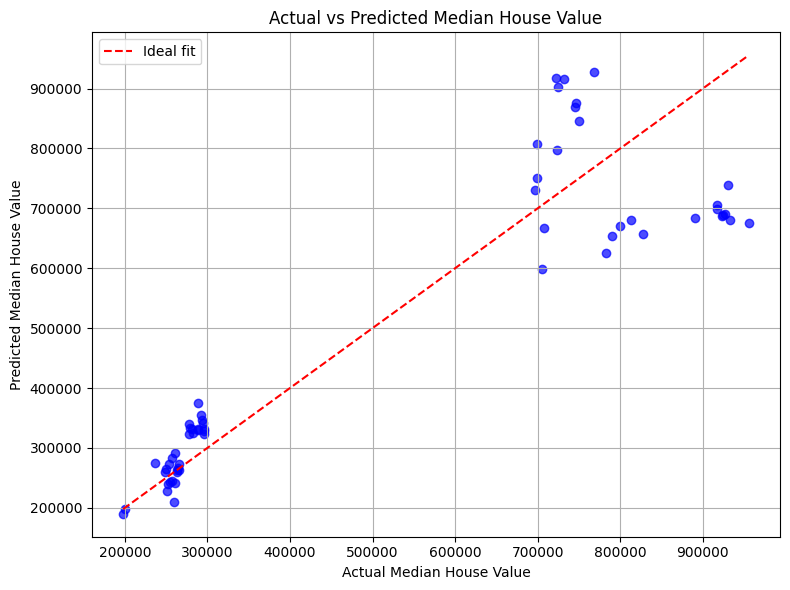

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal fit')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

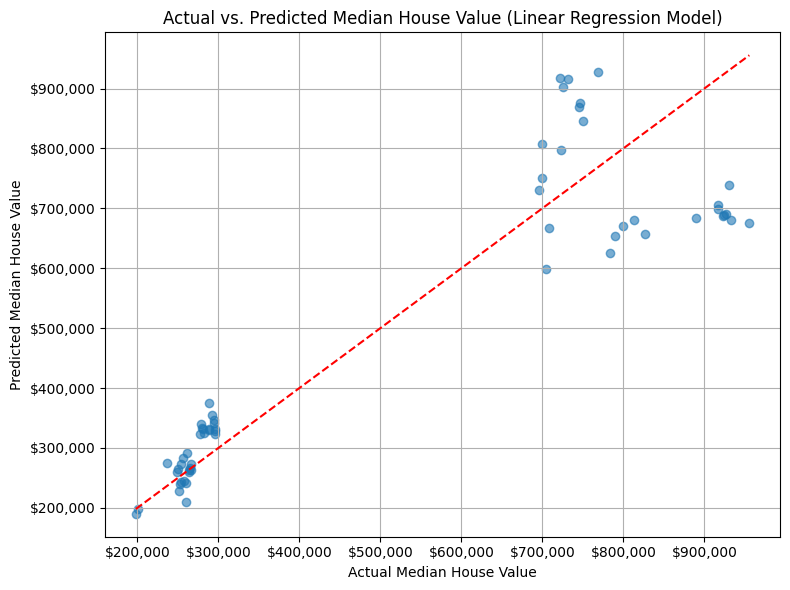

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Formatter function to display values as $ with commas
def currency(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)

# Reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Labels and title
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value (Linear Regression Model)")
plt.grid(True)

# Apply currency formatting
formatter = FuncFormatter(currency)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


## SVR Model Training & Evaluation

Mean Squared Error: 128605573399.41347
R-squared: -0.694301519405895


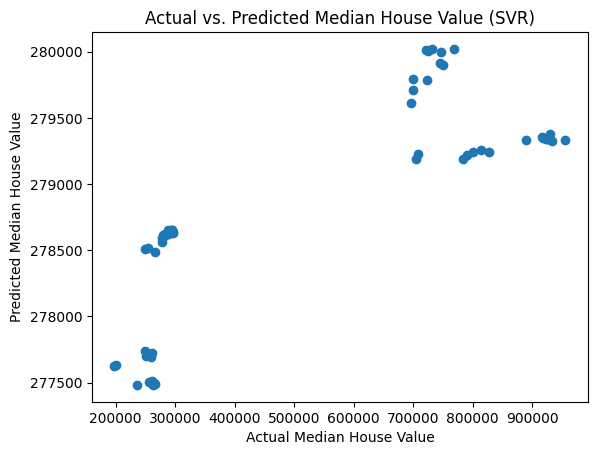

In [ ]:
# Define features (X) and target variable (y)
X = HousingData.drop(['Median House Value','Date'],axis=1)
y = HousingData['Median House Value']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr_model = SVR(kernel='linear') # You can experiment with different kernels ('rbf', 'poly', etc.)
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value (SVR)")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.97      1.00      0.99        38

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Accuracy: 0.9833333333333333
ROC AUC: 0.9976076555023924


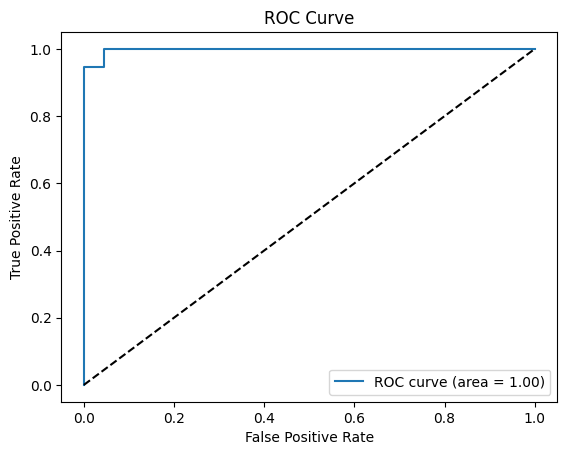

In [ ]:
threshold = HousingData['Median House Value'].median()
HousingData['Expensive'] = HousingData['Median House Value'] > threshold
HousingData['Expensive'] = HousingData['Expensive'].astype(int)

# Define features (X) and target variable (y) for classification
X = HousingData.drop(['Median House Value', 'Date', 'Expensive'], axis=1)
y = HousingData['Expensive']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVC model
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


# Calculate ROC AUC
y_prob = svc_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Model Training & Evaluation

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
HousingData['State_encoded'] = label_encoder.fit_transform(HousingData['State'])

In [ ]:
# Define selected features and target
selected_features = ['Inflation Rate', 'Unemployment Rate','Housing Market Supply','State_encoded', 'Rental Price Index']
target_variable = 'Median House Value'


In [ ]:
# Drop rows with missing values in selected features
HousingData_subset = HousingData.dropna(subset=selected_features + [target_variable])

In [ ]:
# Features and target
X_rf = HousingData_subset[selected_features]
y_rf = HousingData_subset[target_variable]

In [ ]:
# Split into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_rf)

In [ ]:
# Evaluate
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
adjusted_r2_rf = 1 - (1 - r2_rf) * (len(y_test_rf) - 1) / (len(y_test_rf) - X_test_rf.shape[1] - 1)

print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")
print(f"Random Forest Adjusted R-squared: {adjusted_r2_rf:.2f}")

Random Forest Mean Squared Error: 917685995.62
Random Forest R-squared: 0.99
Random Forest Adjusted R-squared: 0.99


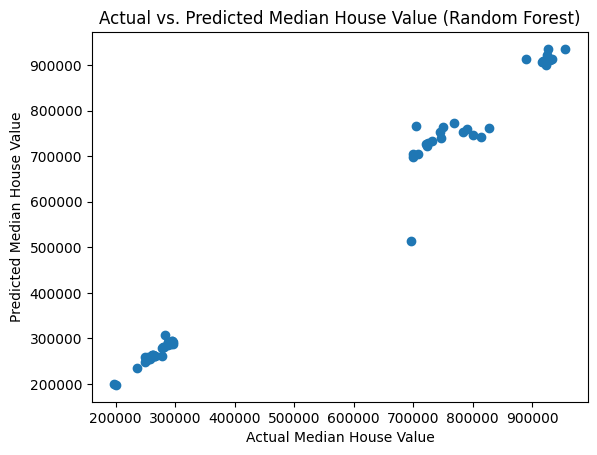

In [ ]:
# Plot predicted vs. actual values
plt.scatter(y_test_rf, y_pred_rf)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value (Random Forest)")
plt.show()

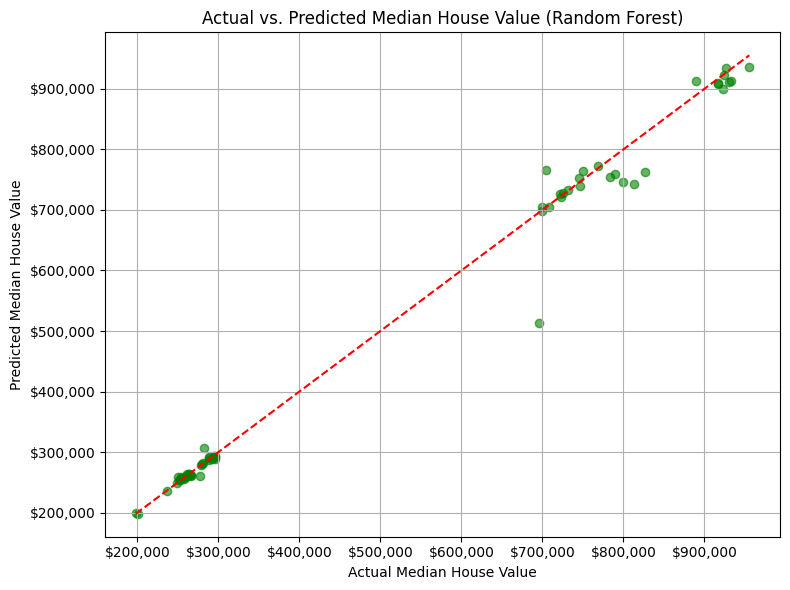

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Currency formatter function
def currency(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(8, 6))
plt.scatter(y_test_rf, y_pred_rf, color='green', alpha=0.6)

# Add red dashed reference line (perfect prediction line)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'r--')

# Labels and title
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value (Random Forest)")

# Apply currency formatting
formatter = FuncFormatter(currency)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.tight_layout()
plt.show()


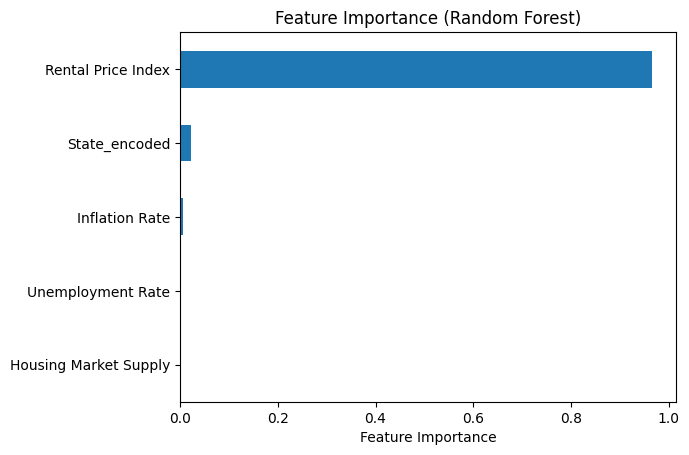

In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X_rf.columns
importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
importance_df.plot(kind='barh')
plt.xlabel("Feature Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

## Comparing 3 models

In [ ]:
# Define models
models = {
    'SVR': SVR(kernel='linear'),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    results.append({
        'Model': name,
        'MSE': mse,
        'R²': r2,
        'Adjusted R²': adj_r2
    })

# Show comparison table
results_df = pd.DataFrame(results)
display(results_df)


,Model,MSE,R²,Adjusted R²
0,SVR,302.933594,-1303.498731,-1672.161416
1,Linear Regression,0.070828,0.694998,0.608802
2,Random Forest,0.009928,0.957246,0.945164


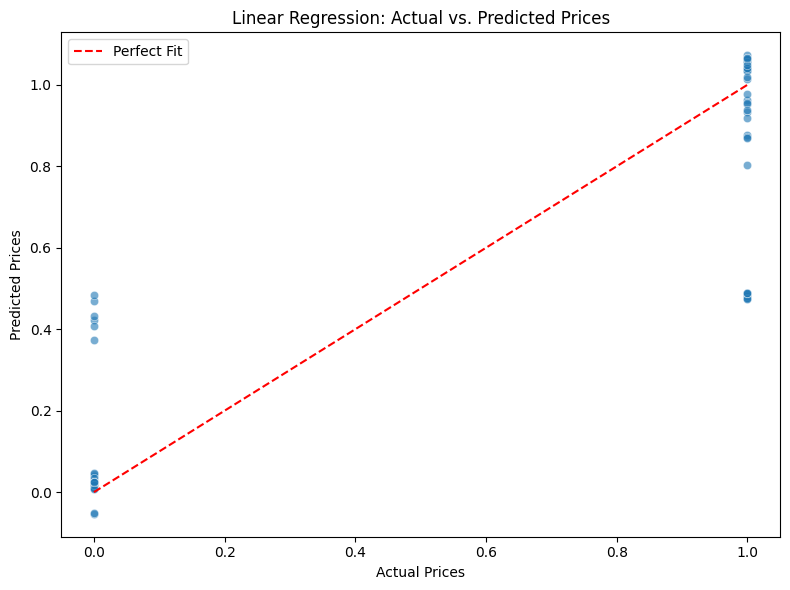

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.legend()
plt.tight_layout()
plt.savefig('linreg_actual_vs_predicted.png', dpi=300)  # Optional for slide
plt.show()


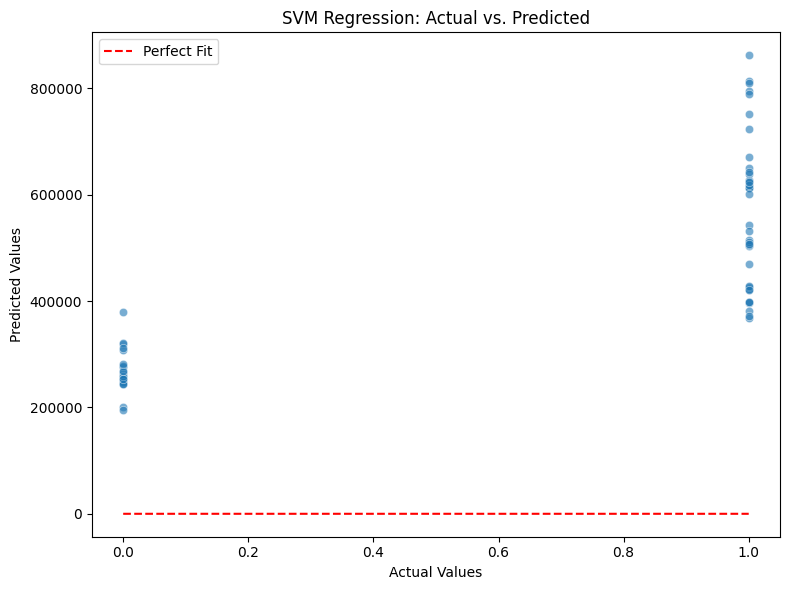

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using the SVM model
y_pred_svm = svr_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_svm, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression: Actual vs. Predicted')
plt.legend()
plt.tight_layout()
plt.show()


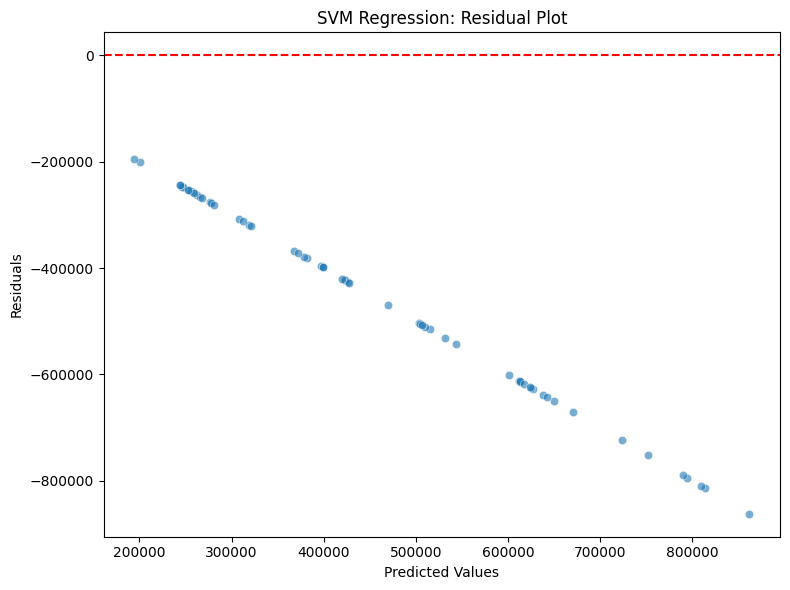

In [ ]:
residuals = y_test - y_pred_svm

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_svm, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('SVM Regression: Residual Plot')
plt.tight_layout()
plt.show()


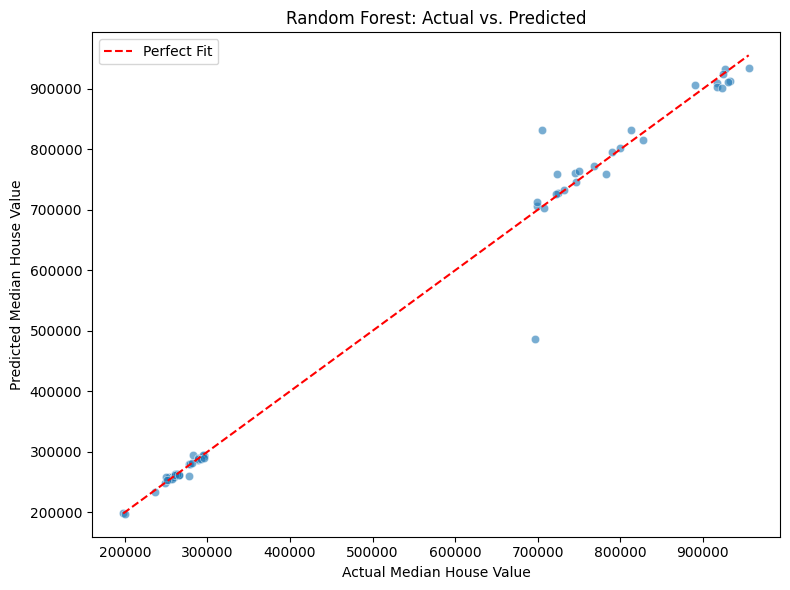

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_rf, y=y_pred_rf, alpha=0.6)
plt.plot([y_test_rf.min(), y_test_rf.max()],
         [y_test_rf.min(), y_test_rf.max()],
         color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest: Actual vs. Predicted')
plt.legend()
plt.tight_layout()
plt.show()